### Ensemble Project - Term Deposit Sale <font color="red">Submitted By: Mayur Makadia</font>

**Github: https://github.com/mayurmakadia1/UTAustin-PGP-AIML/tree/master/2-Supervised-Learning/Ensemble**

#### Attribute information
#### Input variables:
#### Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

#### Related to previous contact:

9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

#### Other attributes:

13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign

#### Output variable (desired target):

17. Target: Tell us has the client subscribed a term deposit. (Yes, No)


## Deliverable – 1 Exploratory data quality report - 1 Univariate Analysis

In [460]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [461]:
# Creating a function for visualizing classifier results
def visClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

In [462]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [463]:
#read the dataset
data_df = pd.read_csv("bank-full.csv")

In [464]:
#quick data review
data_df.head() # To check first 5 rows of data set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Review data

In [465]:
#review data types for columns
print('===============================================================')
print('Data Types:')
print('===============================================================')
print(data_df.info())

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


Lets convert the columns with an 'object' datatype into categorical variables

In [466]:
print('===============================================================')
print('Null values:')
print('===============================================================')
print(data_df.isnull().sum())

Null values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [467]:
for feature in data_df.columns: # Loop through all columns in the dataframe
    if data_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        data_df[feature] = pd.Categorical(data_df[feature])# Replace strings with an integer
data_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [468]:
print('===============================================================')
print('Shape:')
print('===============================================================')
print(data_df.shape)

Shape:
(45211, 17)


In [469]:
print('============================================================================================================')
print('Statistical Summary:')
print('============================================================================================================')
data_df.describe().transpose()

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [470]:
#print the value counts
print(data_df.job.value_counts())
print(data_df.marital.value_counts())
print(data_df.education.value_counts())
print(data_df.default.value_counts())
print(data_df.housing.value_counts())
print(data_df.loan.value_counts())
print(data_df.contact.value_counts())
print(data_df.month.value_counts())
print(data_df.poutcome.value_counts())
print(data_df.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [471]:
data_df['job'].unique()

['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['management', 'technician', 'entrepreneur', 'blue-collar', ..., 'self-employed', 'unemployed', 'housemaid', 'student']

In [472]:
data_df['education'].unique()

['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, object): ['tertiary', 'secondary', 'unknown', 'primary']

In [473]:
data_df['marital'].unique()

['married', 'single', 'divorced']
Categories (3, object): ['married', 'single', 'divorced']

In [474]:
data_df['contact'].unique()

['unknown', 'cellular', 'telephone']
Categories (3, object): ['unknown', 'cellular', 'telephone']

In [475]:
data_df['poutcome'].unique()

['unknown', 'failure', 'other', 'success']
Categories (4, object): ['unknown', 'failure', 'other', 'success']

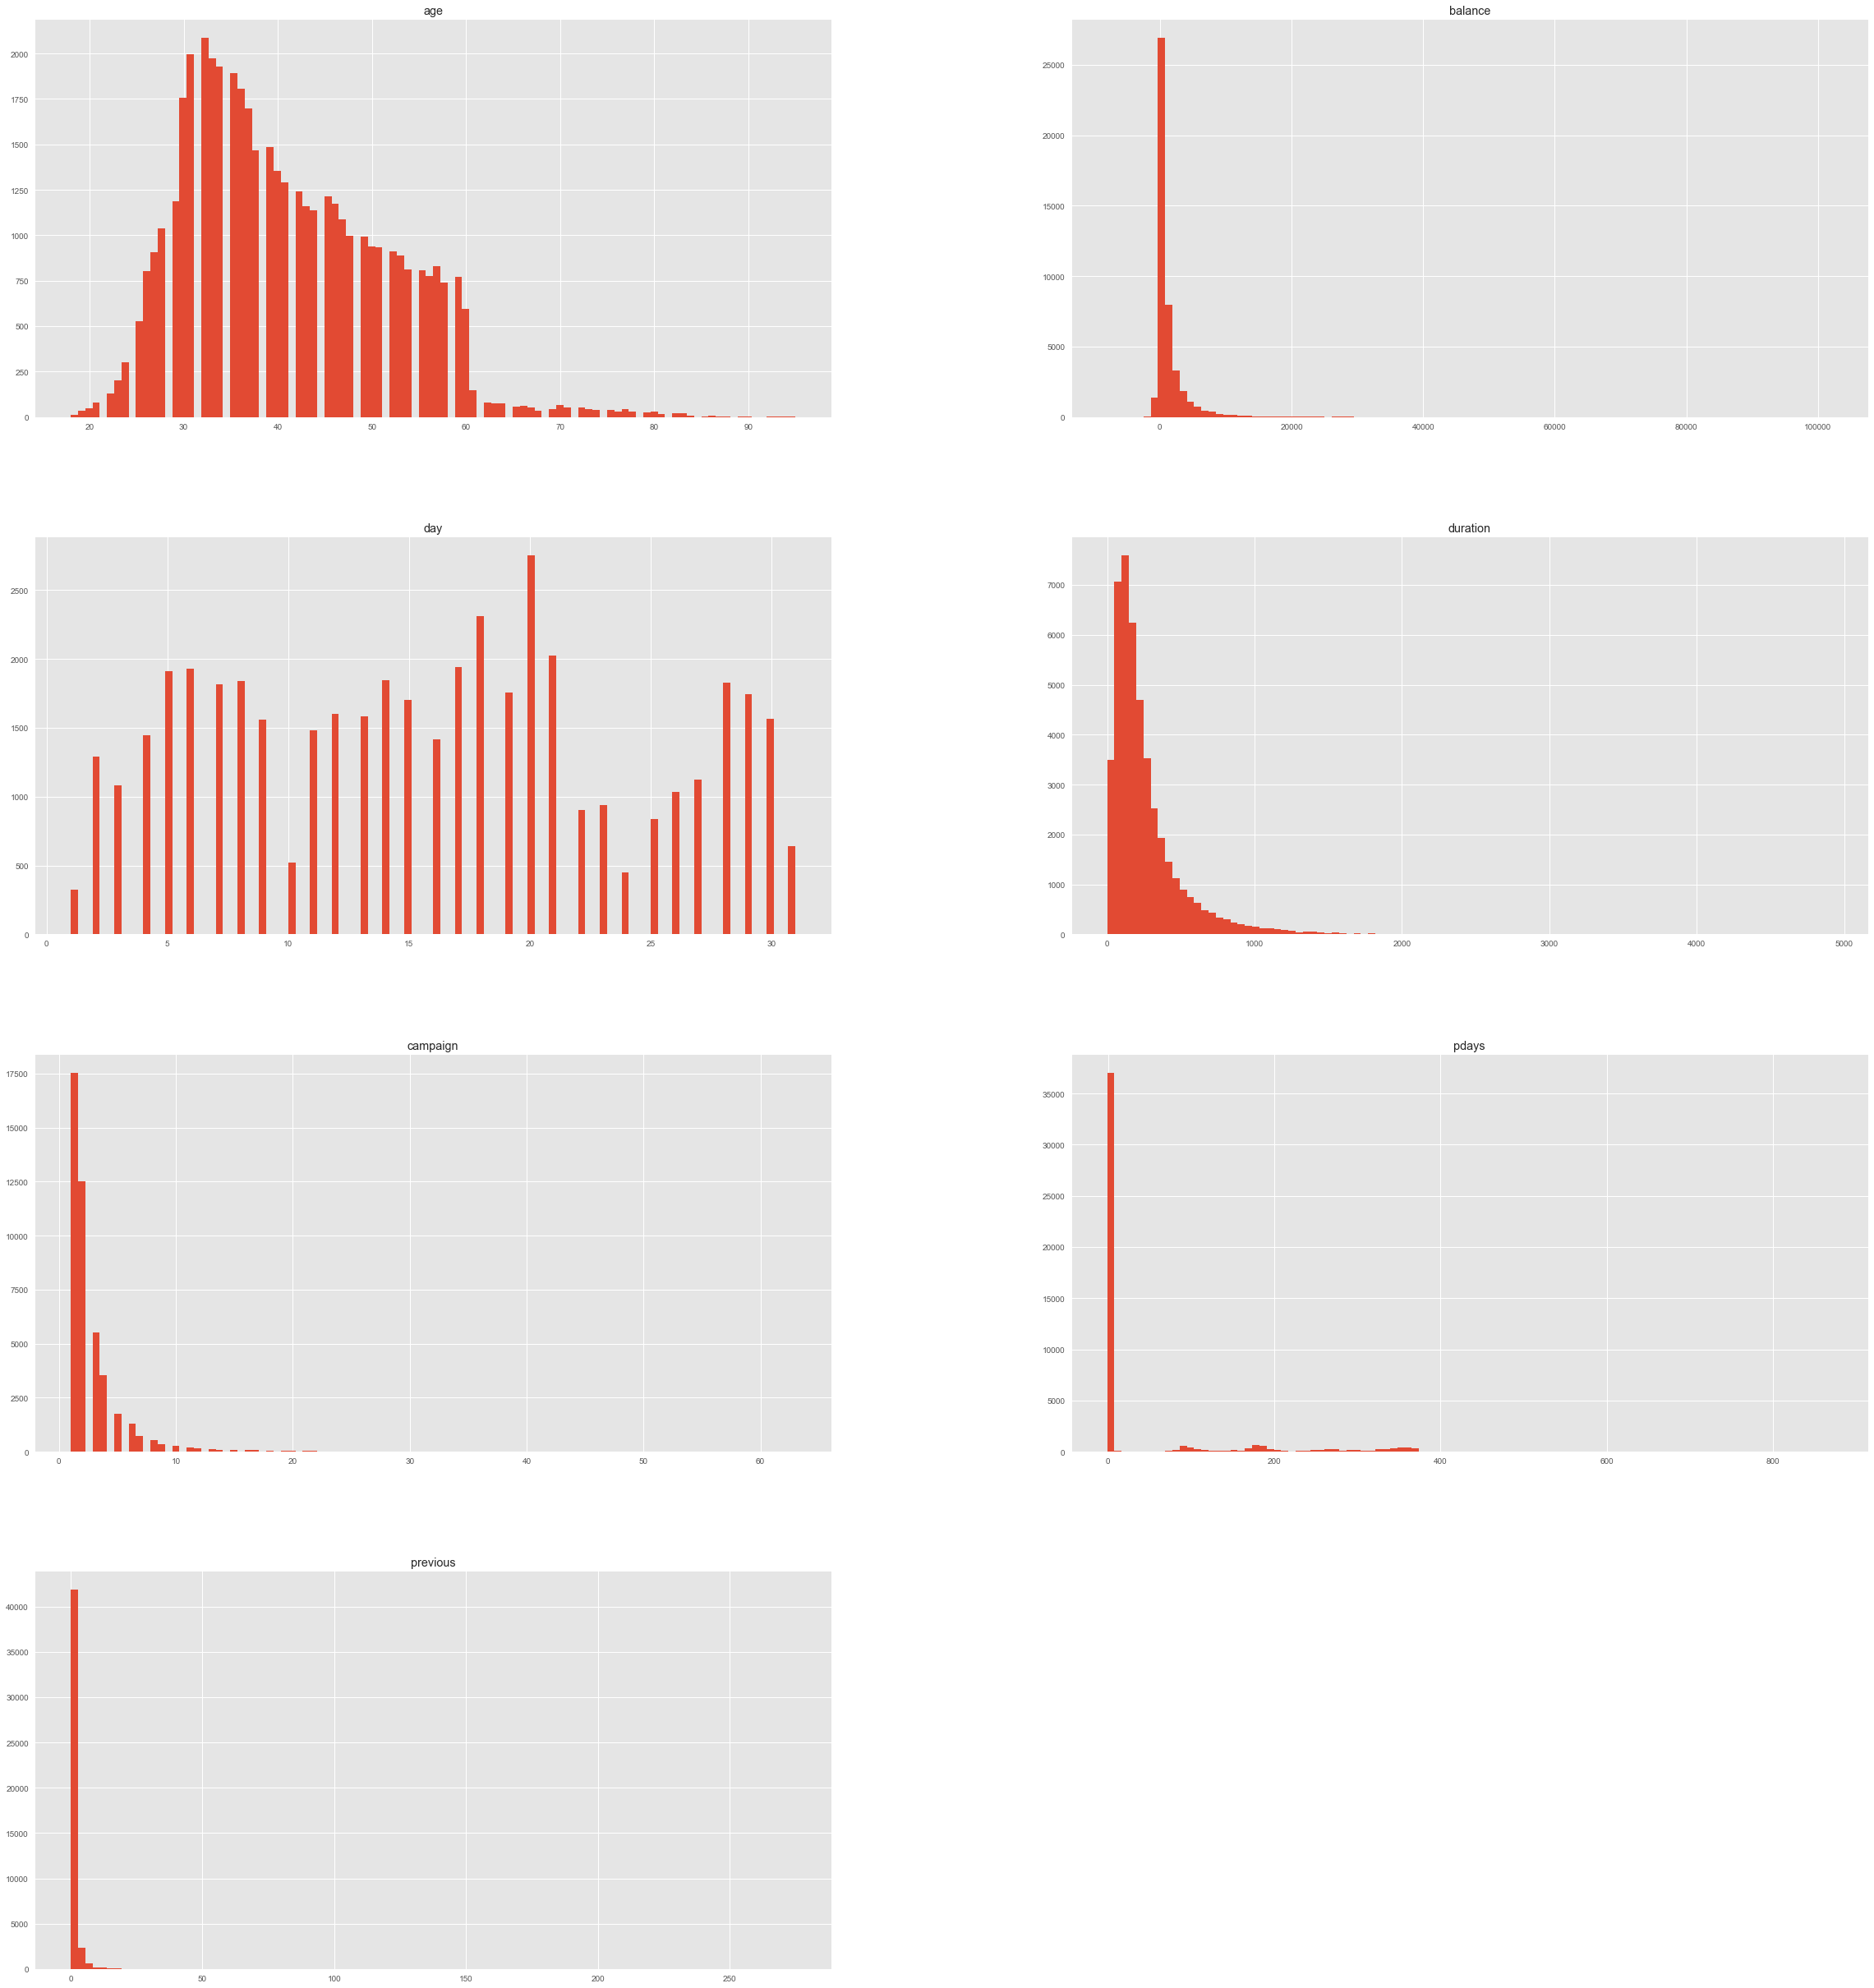

In [476]:
#Univariate graph plots
columns = list(data_df)[0:] 
data_df[columns].hist(stacked=False, bins=100, figsize=(40,90), layout=(8,2)); 

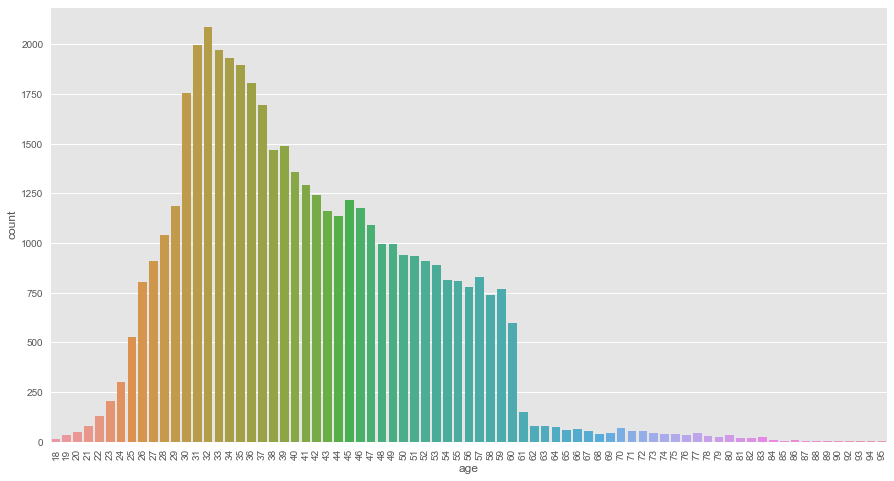

In [477]:
plt.figure(figsize=(15,8))
sns.countplot(data_df['age'])
plt.xticks(rotation=90)
plt.show()

#### Lots of clients in age range between 30 and 40

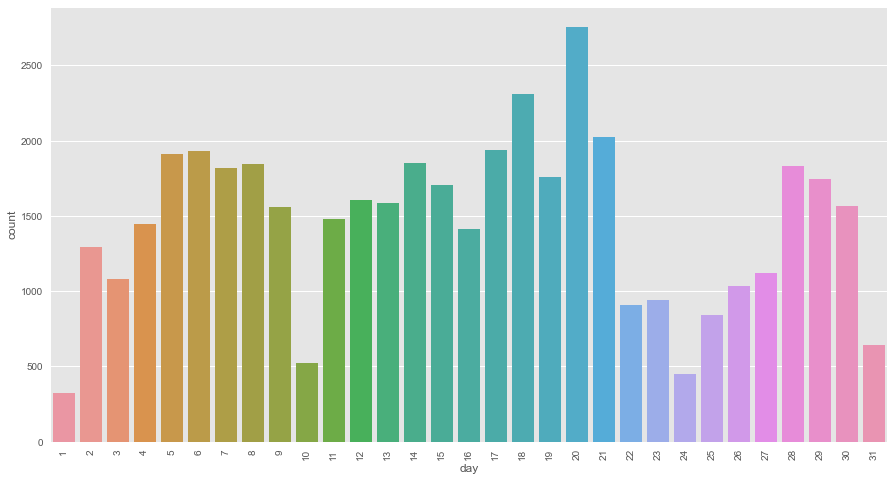

In [478]:
plt.figure(figsize=(15,8))
sns.countplot(data_df['day'])
plt.xticks(rotation=90)
plt.show()

## Deliverable – 1 Exploratory data quality report - 2 Multivariate analysis & Deliverable – 2 Prepare the data for analytics

In [479]:
#update the data to switch to numeric values
replaceStruct = {
                "loan":     {"no": 0, "yes": 1 },
                "housing":     {"no": 0, "yes": 1 } ,
                "default":     {"no": 0, "yes": 1 } ,
                "Target":     {"no": 0, "yes": 1 }
                }

In [480]:
data_df=data_df.replace(replaceStruct)

In [481]:
data_df['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [482]:
n_false = len(data_df.loc[data_df['Target'] == 0])
n_true = len(data_df.loc[data_df['Target'] == 1])
print('==============================================')
print('Target')
print('==============================================')
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Target
Number of true cases: 5289 (11.70%)
Number of false cases: 39922 (88.30%)


#### Classes are imbalanced. Ratio of no-subscription to subscription instances is 88.3:11.70. Classes needs to be balanced. Only 11.7% clients subscribed to Term Loan Deposit. Lets explore more data and then we will need to balance the classes by performing oversampling

In [483]:
data_df.groupby('Target').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
Target,,,,,,,,,,
0,40.84,0.02,"1,303.71",0.58,0.17,15.89,221.18,2.85,36.42,0.50
1,41.67,0.01,"1,804.27",0.37,0.09,15.16,537.29,2.14,68.70,1.17


#### Observations:
- Average age of clients who subscribed the term deposit is higher than that of the clients who didn’t.
- Clients with less credit in default subscribed to term deposit
- Clients with higher balance in the account subscribed to term deposit
- Clients with lesser housing and personal loans subscribed to term deposit
- Last contact duration is higher for the clients who subscribed to term deposit.
- Surprisingly, campaigns (number of contacts during the current campaign) are lower for clients who subscribed term deposit.
- The pdays (days since the client was last contacted) is surprisingly higher for the clients who subscribed.
- More clients subscribed to term deposit if they were contacted higher number of times

- Lets calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense   of the data.


In [484]:
data_df.groupby('job').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
job,,,,,,,,,,,
admin.,39.29,0.01,"1,135.84",0.62,0.19,15.56,246.90,2.58,47.86,0.67,0.12
blue-collar,40.04,0.02,"1,078.83",0.72,0.17,15.44,262.90,2.82,44.03,0.51,0.07
entrepreneur,42.19,0.04,"1,521.47",0.58,0.24,15.70,256.31,2.80,32.49,0.48,0.08
housemaid,46.42,0.02,"1,392.40",0.32,0.12,16.00,245.82,2.82,21.51,0.37,0.09
management,40.45,0.02,"1,763.62",0.49,0.13,16.11,254.00,2.86,38.67,0.67,0.14
retired,61.63,0.01,"1,984.22",0.22,0.14,15.44,287.36,2.35,37.44,0.64,0.23
self-employed,40.48,0.02,"1,647.97",0.48,0.15,16.03,268.16,2.85,34.75,0.55,0.12
services,38.74,0.02,997.09,0.67,0.20,15.64,259.32,2.72,42.00,0.50,0.09
student,26.54,0.00,"1,388.06",0.27,0.01,14.90,246.66,2.30,57.04,0.95,0.29


In [485]:
data_df.groupby('marital').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
marital,,,,,,,,,,,
divorced,45.78,0.02,"1,178.87",0.56,0.18,15.80,262.52,2.63,41.00,0.55,0.12
married,43.41,0.02,"1,425.93",0.56,0.17,15.85,253.41,2.84,37.95,0.56,0.10
single,33.70,0.02,"1,301.50",0.54,0.13,15.71,266.50,2.65,44.65,0.64,0.15


In [486]:
data_df.groupby('education').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
education,,,,,,,,,,,
primary,45.87,0.02,"1,250.95",0.57,0.15,15.42,255.93,2.83,36.08,0.49,0.09
secondary,39.96,0.02,"1,154.88",0.61,0.19,15.76,258.69,2.70,42.35,0.57,0.11
tertiary,39.59,0.01,"1,758.42",0.48,0.13,16.09,258.52,2.83,39.02,0.66,0.15
unknown,44.51,0.02,"1,526.75",0.44,0.07,15.81,257.31,2.85,36.86,0.49,0.14


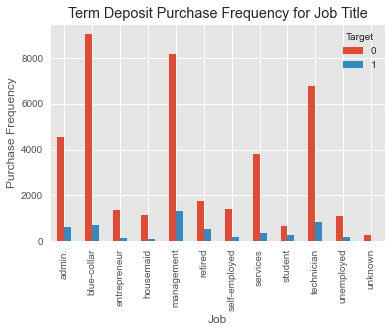

In [487]:
pd.crosstab(data_df.job,data_df.Target).plot(kind='bar')
plt.title('Term Deposit Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Purchase Frequency')
plt.savefig('job_purchase_freq')

#### It seems that the frequency of term deposit subscription depends on job title. Job title can be a good predictor of the Target variable.

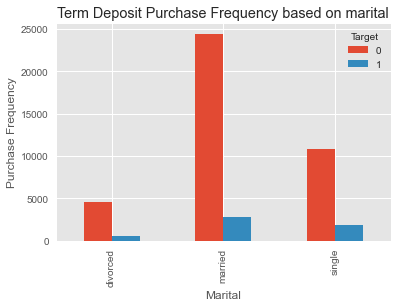

In [488]:
pd.crosstab(data_df.marital,data_df.Target).plot(kind='bar')
plt.title('Term Deposit Purchase Frequency based on marital')
plt.xlabel('Marital')
plt.ylabel('Purchase Frequency')
plt.savefig('marital_purchase_freq')

#### It seems that the frequency of term deposit subscription does not depend too much on marital status. Married status is marginally seen to be subscribing more to term deposits than other statuses.

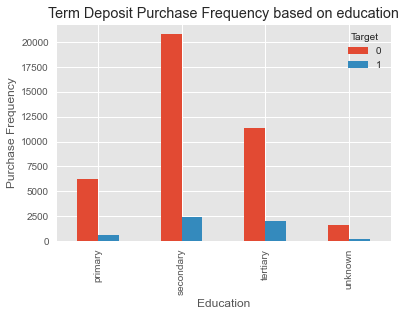

In [489]:
pd.crosstab(data_df.education,data_df.Target).plot(kind='bar')
plt.title('Term Deposit Purchase Frequency based on education')
plt.xlabel('Education')
plt.ylabel('Purchase Frequency')
plt.savefig('education_purchase_freq')

#### Education seems to be a good predictor of the target variable

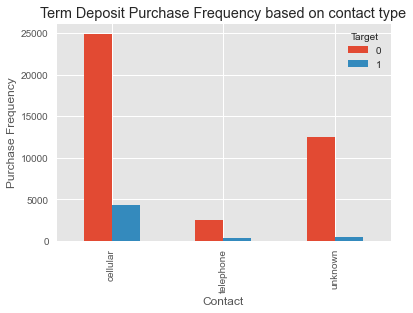

In [490]:
pd.crosstab(data_df.contact,data_df.Target).plot(kind='bar')
plt.title('Term Deposit Purchase Frequency based on contact type')
plt.xlabel('Contact')
plt.ylabel('Purchase Frequency')
plt.savefig('education_purchase_freq')

#### Type of phone contact seems to be a good predictor of the target variable.

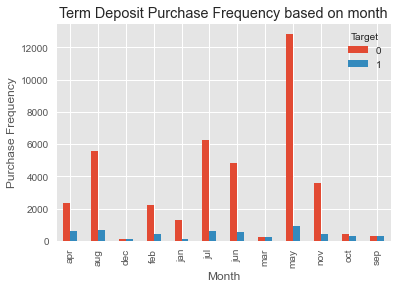

In [491]:
pd.crosstab(data_df.month,data_df.Target).plot(kind='bar')
plt.title('Term Deposit Purchase Frequency based on month')
plt.xlabel('Month')
plt.ylabel('Purchase Frequency')
plt.savefig('education_purchase_freq')

#### Month seems to be a good predictor of the target variable

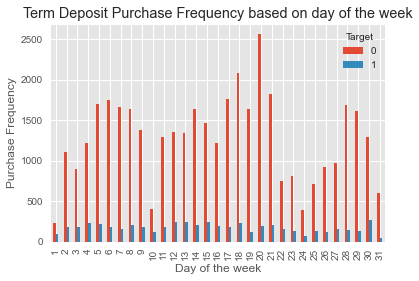

In [492]:
pd.crosstab(data_df.day,data_df.Target).plot(kind='bar')
plt.title('Term Deposit Purchase Frequency based on day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Purchase Frequency')
plt.savefig('education_purchase_freq')

#### Day of the month does not seem to be good predictor of the target variable 

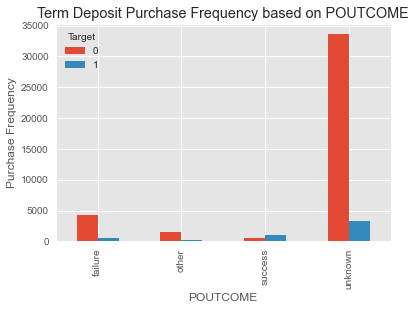

In [493]:
pd.crosstab(data_df.poutcome,data_df.Target).plot(kind='bar')
plt.title('Term Deposit Purchase Frequency based on POUTCOME')
plt.xlabel('POUTCOME')
plt.ylabel('Purchase Frequency')
plt.savefig('education_purchase_freq')

#### poutcome seems to be a good predictor of the target variable

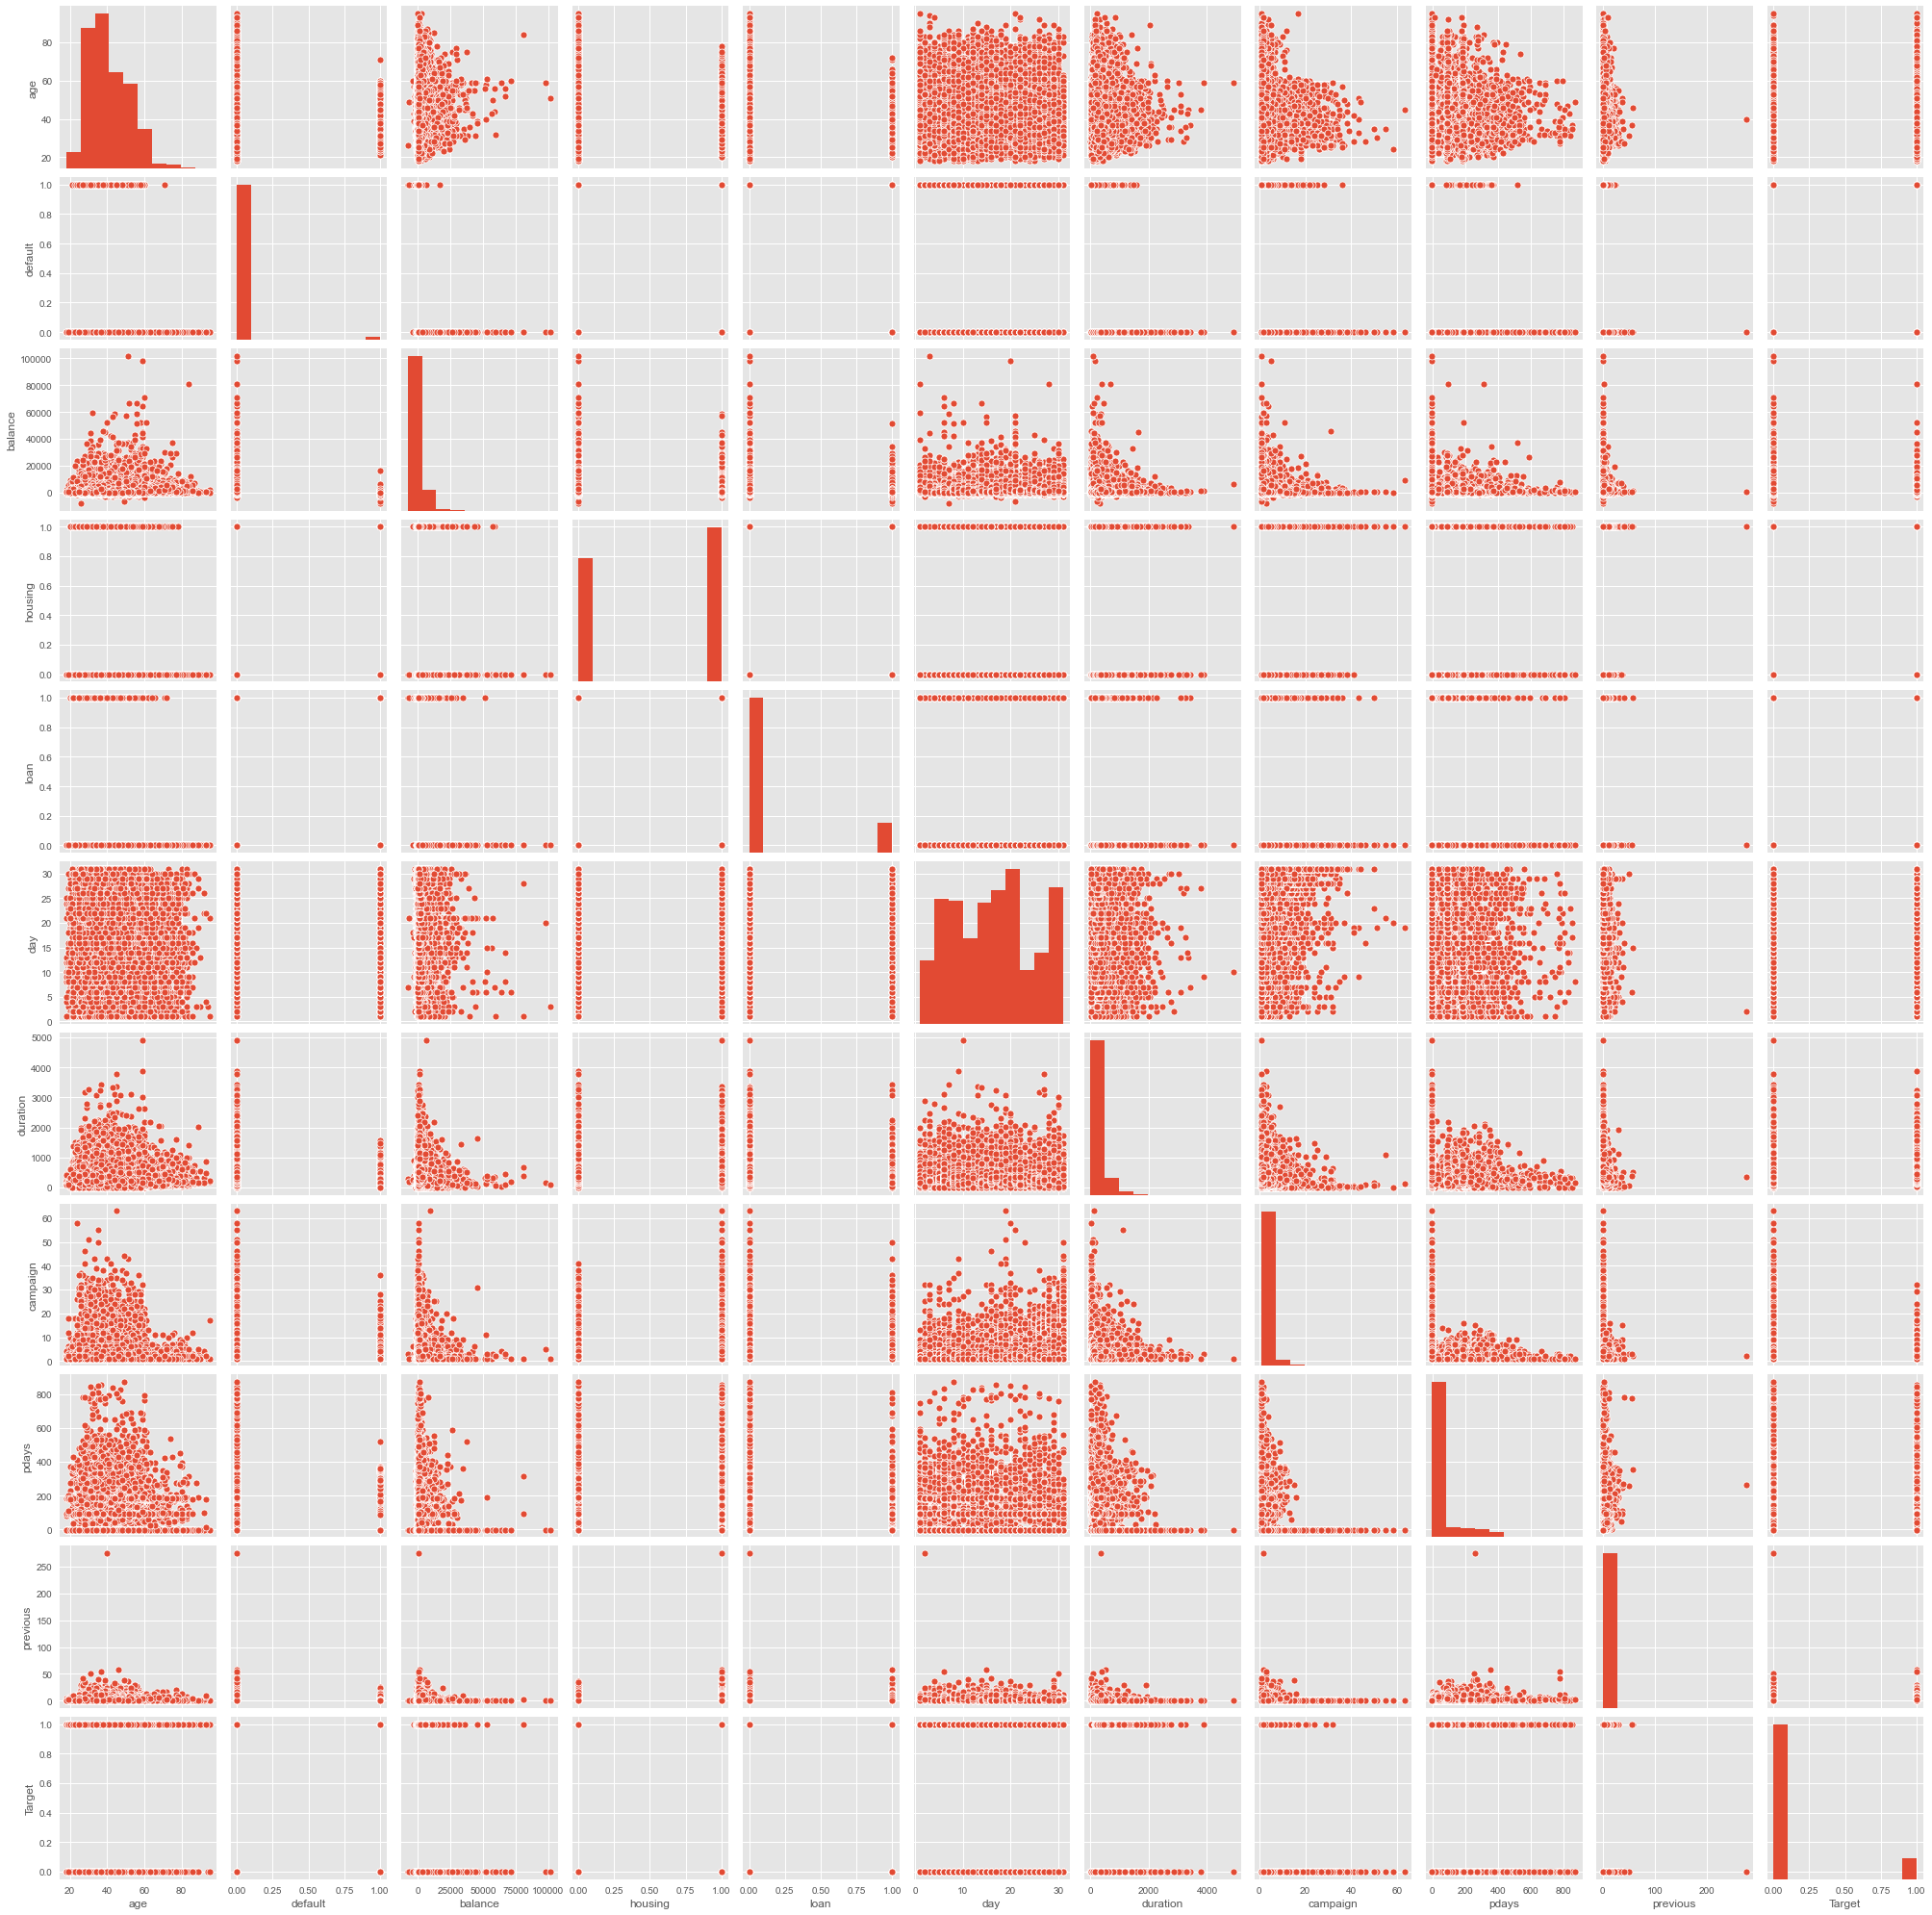

In [494]:
sns.pairplot(data_df)

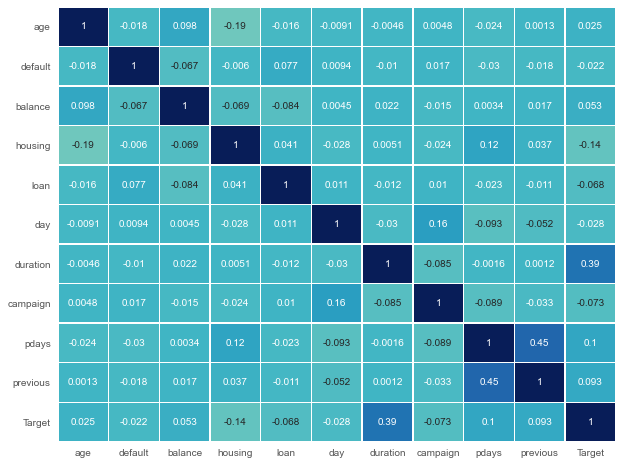

In [495]:
plt.figure(figsize=(10,8))

sns.heatmap(data_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [496]:
#perform one hot encoding
oneHotCols=["job","marital","education","contact","month","poutcome"]
data_df=pd.get_dummies(data_df, columns=oneHotCols)
data_df.head(10)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
5,35,0,231,1,0,5,139,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
6,28,0,447,1,1,5,217,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
7,42,1,2,1,0,5,380,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
8,58,0,121,1,0,5,50,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
9,43,0,593,1,0,5,55,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [497]:
print('===============================================================')
print('Shape:')
print('===============================================================')
print(data_df.shape)

Shape:
(45211, 49)


## Deliverable – 3 Create the ensemble model

- Define X and Y variables

In [498]:
#Define X and Y variables
X = data_df.loc[:, data_df.columns != 'Target']  # independent variables
y = data_df.loc[:, data_df.columns == 'Target']  # Target variable

### Because classes are imbalanced, we need to use Oversampling. Creating dataset to be used using oversampling.

In [499]:
y_os_1_1 = y[y['Target'] == 1]
y_os_1_index = y_os_1_1.index
X_os_1_1 = X.iloc[y_os_1_index]

In [500]:
#add oversampling data to X and Y variables
X_os_1 = X_os_1_1
X_os_1 = X_os_1.append(X_os_1)
X_os_1 = X_os_1.append(X_os_1)
X_os_1 = X_os_1.append(X_os_1_1)
X_os_1 = X_os_1.append(X_os_1_1)
X_os_1 = X_os_1.append(X_os_1_1)

y_os_1 = y_os_1_1
y_os_1 = y_os_1.append(y_os_1)
y_os_1 = y_os_1.append(y_os_1)
y_os_1 = y_os_1.append(y_os_1_1)
y_os_1 = y_os_1.append(y_os_1_1)
y_os_1 = y_os_1.append(y_os_1_1)


In [501]:
X_os_1.reset_index(inplace = True,drop = True),y_os_1.reset_index(inplace = True,drop = True)

(None, None)

In [502]:
X_os_1.shape,y_os_1.shape

((37023, 48), (37023, 1))

In [503]:
y_os_0 = y[y['Target'] == 0]
y_os_0_index = y_os_0.index
X_os_0 = X.iloc[y_os_0_index]

In [504]:
X_os_0.shape,y_os_0.shape

((39922, 48), (39922, 1))

In [505]:
X = X_os_0.append(X_os_1)
y = y_os_0.append(y_os_1)

In [506]:
X.shape,y.shape

((76945, 48), (76945, 1))

## Task 3 - Split the data into training and test set in the ratio of 70:30 respectively
We will use 70% of data for training and 30% for testing.

In [507]:
##Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
X_train.shape, X_test.shape

((53861, 48), (23084, 48))

In [508]:
#check the training and testing data split based on target variable after oversampling
X_train.shape,y_train.shape,y_train[y_train['Target'] == 0].shape,y_train[y_train['Target'] == 1].shape

((53861, 48), (53861, 1), (27846, 1), (26015, 1))

In [509]:
X_test.shape,y_test.shape,y_test[y_test['Target'] == 0].shape,y_test[y_test['Target'] == 1].shape

((23084, 48), (23084, 1), (12076, 1), (11008, 1))

Lets check split of data

In [510]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(X.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(X.index)) * 100))

70.00% data is in training set
30.00% data is in test set


## Logistic Regression model

In [511]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=7)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [514]:
y_predict = model.predict(X_test)
train_acc = model.score(X_train,y_train)
test_acc = accuracy_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test,y_predict)

METRICS RELATED TO LOGISTIC REGRESSION (BEFORE TUNING) MODEL PERFORMANCE
Trainig accuracy 0.8065947531609142

Testing accuracy 0.8080488650147288

Confusion Matrix


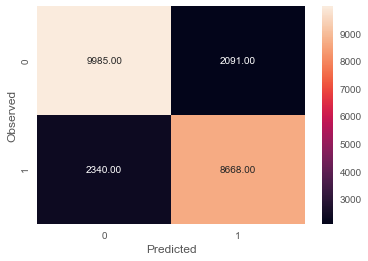

None
Recall: 0.7874273255813954

Precision: 0.8056510828143879

F1 Score: 0.7964349703679883

Roc Auc Score: 0.8071369817704922


In [515]:
print("===============================================================") 
print("METRICS RELATED TO LOGISTIC REGRESSION (BEFORE TUNING) MODEL PERFORMANCE") 
print("===============================================================") 
print("Trainig accuracy",train_acc)  
print()
print("Testing accuracy",test_acc)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Recall:",recall)
print()
print("Precision:",precision)
print()
print("F1 Score:",f1)
print()
print("Roc Auc Score:",roc_auc)

In [516]:
coef_df = pd.DataFrame(logreg.coef_)
coef_df['intercept'] = logreg.intercept_
print(coef_df)

      0     1    2     3     4     5    6     7     8    9  ...   39    40  \
0 -0.01 -0.03 0.00 -0.91 -0.28 -0.01 0.01 -0.11 -0.00 0.26  ... 0.16 -0.60   

     41   42   43    44    45   46    47  intercept  
0 -0.10 0.16 0.12 -0.18 -0.03 0.44 -0.46      -0.23  

[1 rows x 49 columns]


In [517]:
#Logistic regression better accuracy with liblinear with l1 and C=1
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=1) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
train_acc = model.score(X_train,y_train)
test_acc = accuracy_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test,y_predict)

In [518]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'],'Train Acc(%)': [train_acc*100],'Test Acc(%)': [test_acc*100], 'Recall(%)': [recall*100], 'Precision(%)': [precision*100], 'F1 Score(%)': [f1*100], 'ROC AUC Score(%)': [roc_auc*100]})
resultsDf = resultsDf[['Method', 'Train Acc(%)','Test Acc(%)', 'Recall(%)','Precision(%)','F1 Score(%)','ROC AUC Score(%)']]
resultsDf

,Method,Train Acc(%),Test Acc(%),Recall(%),Precision(%),F1 Score(%),ROC AUC Score(%)
0,Logistic Regression,83.37,83.34,80.54,83.88,82.18,83.22


METRICS RELATED TO LOGISTIC REGRESSION (AFTER TUNING) MODEL PERFORMANCE
Trainig accuracy 0.8337386977590464

Testing accuracy 0.8333910933980246

Confusion Matrix


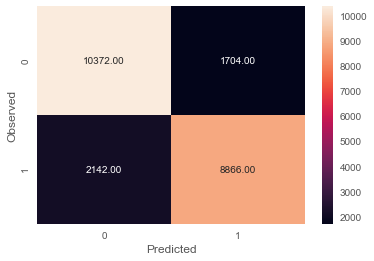

None
Recall: 0.8054142441860465

Precision: 0.8387890255439925

F1 Score: 0.821762906664195

Roc Auc Score: 0.8321539587939175


In [519]:
print("===============================================================") 
print("METRICS RELATED TO LOGISTIC REGRESSION (AFTER TUNING) MODEL PERFORMANCE") 
print("===============================================================") 
print("Trainig accuracy",train_acc)  
print()
print("Testing accuracy",test_acc)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Recall:",recall)
print()
print("Precision:",precision)
print()
print("F1 Score:",f1)
print()
print("Roc Auc Score:",roc_auc)

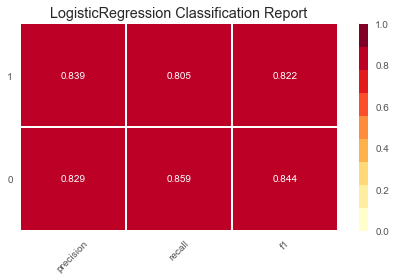

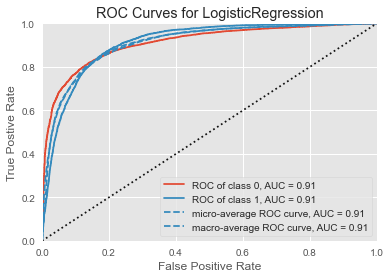

In [520]:
# Visualize model performance with yellowbrick library
visClassifierResults(LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=1))

## Decision Tree model using Gini

In [521]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [522]:
trainAcc = dTree.score(X_train, y_train)
testAcc = dTree.score(X_test, y_test)
print(trainAcc)
print(testAcc)

1.0
0.9563767111419165


### Prune the tree to reduce overfitting

In [523]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
dTreeR.fit(X_train, y_train)
trainAcc = dTreeR.score(X_train, y_train)
testAcc = dTreeR.score(X_test, y_test)
print(trainAcc)
print(testAcc)

0.7860418484617813
0.7863022006584648


In [524]:
#predict on test
y_predict = dTreeR.predict(X_test)
train_acc = dTreeR.score(X_train,y_train)
test_acc = accuracy_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test,y_predict)

In [525]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree (Gini)'],'Train Acc(%)': [train_acc*100],'Test Acc(%)': [test_acc*100], 'Recall(%)': [recall*100], 'Precision(%)': [precision*100], 'F1 Score(%)': [f1*100], 'ROC AUC Score(%)': [roc_auc*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Acc(%)','Test Acc(%)', 'Recall(%)','Precision(%)','F1 Score(%)','ROC AUC Score(%)']]
resultsDf

,Method,Train Acc(%),Test Acc(%),Recall(%),Precision(%),F1 Score(%),ROC AUC Score(%)
0,Logistic Regression,83.37,83.34,80.54,83.88,82.18,83.22
0,Decision Tree (Gini),78.60,78.63,87.48,73.04,79.61,79.02


METRICS RELATED TO DECISION TREE (GINI) MODEL PERFORMANCE
Trainig accuracy 0.7860418484617813

Testing accuracy 0.7863022006584648

Confusion Matrix


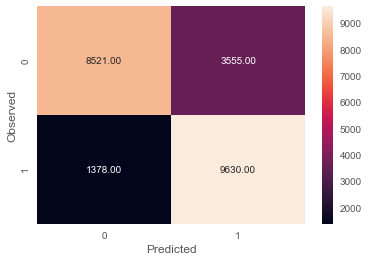

None
Recall: 0.8748183139534884

Precision: 0.7303754266211604

F1 Score: 0.7960980448890175

Roc Auc Score: 0.7902163779108283


In [526]:
print("===============================================================") 
print("METRICS RELATED TO DECISION TREE (GINI) MODEL PERFORMANCE") 
print("===============================================================") 
print("Trainig accuracy",train_acc)  
print()
print("Testing accuracy",test_acc)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Recall:",recall)
print()
print("Precision:",precision)
print()
print("F1 Score:",f1)
print()
print("Roc Auc Score:",roc_auc)

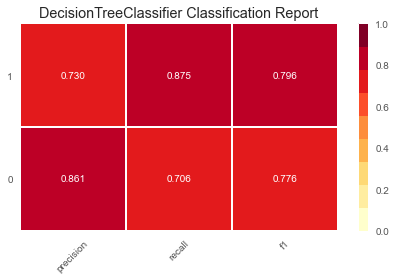

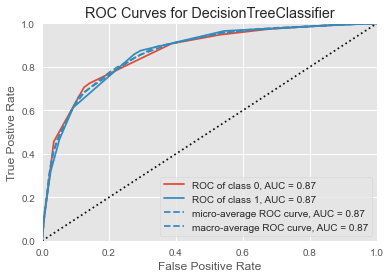

In [527]:
# Visualize model performance with yellowbrick library
visClassifierResults(DecisionTreeClassifier(criterion = "gini", max_depth=4))

## Create the decision tree model using “entropy” method

In [528]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [529]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [530]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.96


### Prune the tree to reduce overfitting

In [531]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [532]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.78
Test: 0.78


In [533]:
y_train.value_counts()

Target
0         27846
1         26015
dtype: int64

## Review decision tree details

In [534]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

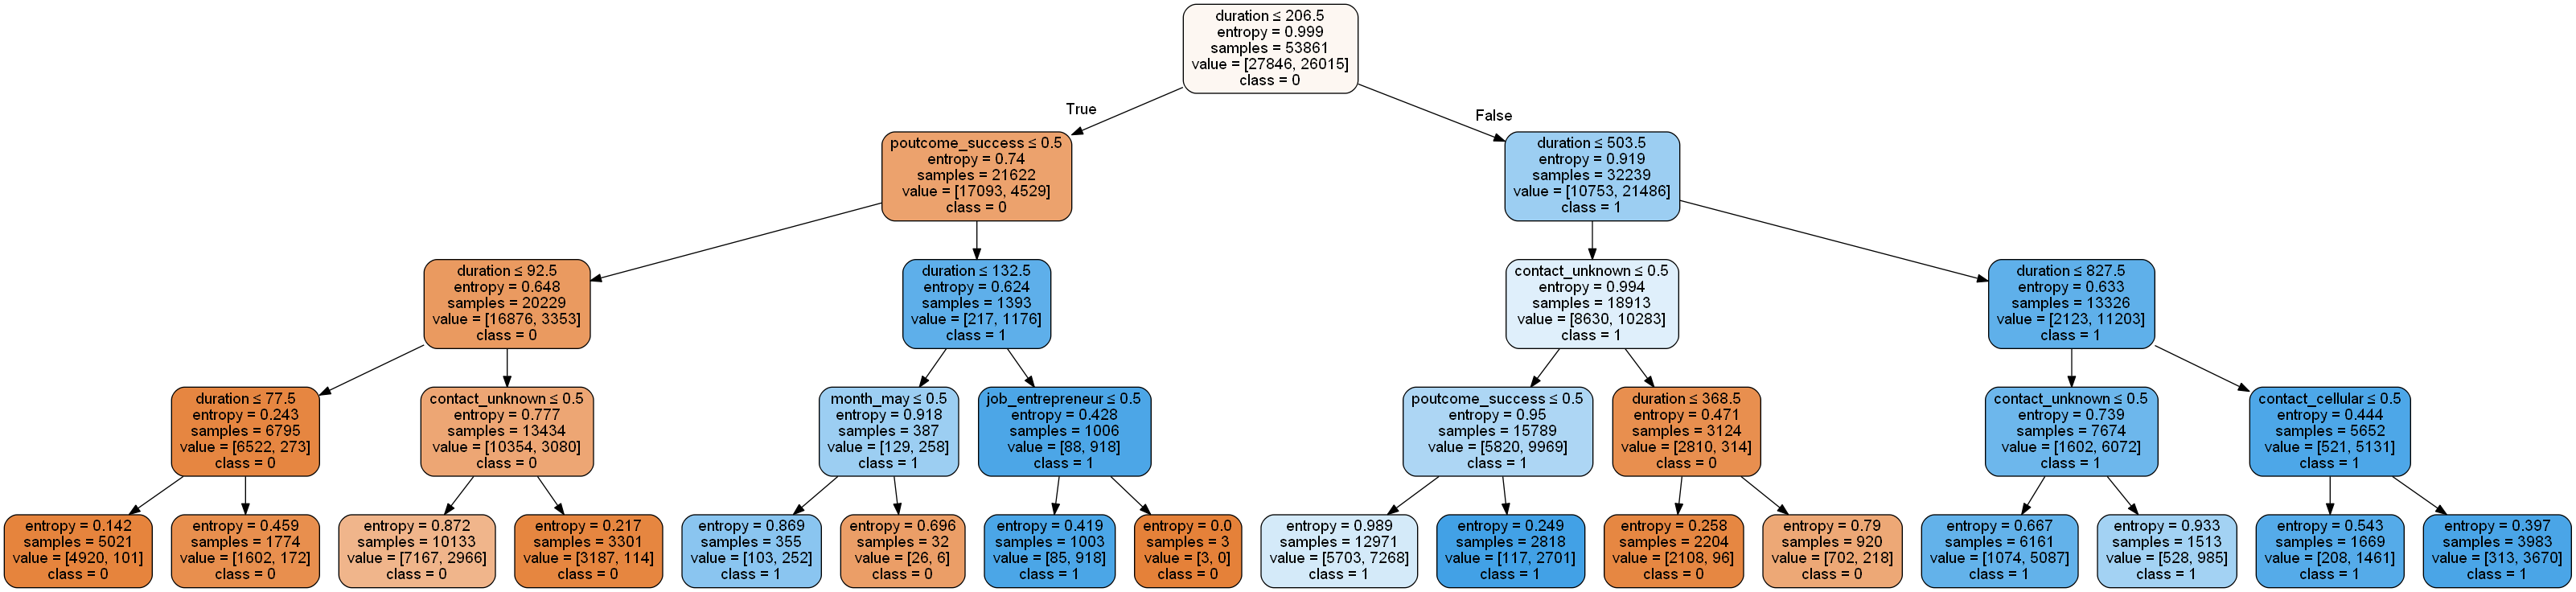

In [535]:
features = [col for col in data_df.columns if col != 'Target']
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('target.png')
Image(graph.create_png())

In [536]:
preds_train = clf_pruned.predict(X_train)
y_predict = clf_pruned.predict(X_test)

In [537]:
train_acc = clf_pruned.score(X_train,y_train)
test_acc = accuracy_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test,y_predict)

In [538]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree (Entropy)'],'Train Acc(%)': [train_acc*100],'Test Acc(%)': [test_acc*100], 'Recall(%)': [recall*100], 'Precision(%)': [precision*100], 'F1 Score(%)': [f1*100], 'ROC AUC Score(%)': [roc_auc*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Acc(%)','Test Acc(%)', 'Recall(%)','Precision(%)','F1 Score(%)','ROC AUC Score(%)']]
resultsDf

,Method,Train Acc(%),Test Acc(%),Recall(%),Precision(%),F1 Score(%),ROC AUC Score(%)
0,Logistic Regression,83.37,83.34,80.54,83.88,82.18,83.22
0,Decision Tree (Gini),78.60,78.63,87.48,73.04,79.61,79.02
0,Decision Tree (Entropy),78.08,78.18,85.36,73.28,78.86,78.49


METRICS RELATED TO DECISION TREE (ENTROPY) MODEL PERFORMANCE
Trainig accuracy 0.7808432817808804

Testing accuracy 0.781753595564027

Confusion Matrix


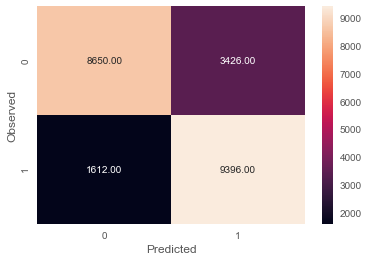

None
Recall: 0.8535610465116279

Precision: 0.7328029948525971

F1 Score: 0.7885858161980697

Roc Auc Score: 0.784928916763598


In [539]:
print("===============================================================") 
print("METRICS RELATED TO DECISION TREE (ENTROPY) MODEL PERFORMANCE") 
print("===============================================================") 
print("Trainig accuracy",train_acc)  
print()
print("Testing accuracy",test_acc)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Recall:",recall)
print()
print("Precision:",precision)
print()
print("F1 Score:",f1)
print()
print("Roc Auc Score:",roc_auc)

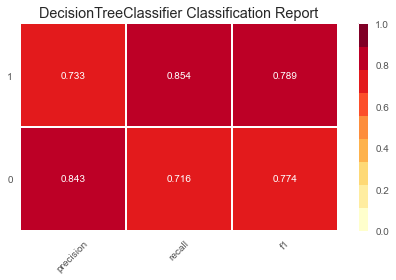

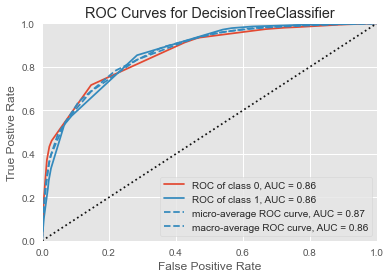

In [540]:
# Visualize model performance with yellowbrick library
visClassifierResults(DecisionTreeClassifier(criterion = "entropy", max_depth=4))

In [541]:
data_df['ProbTarget_0'] = clf_pruned.predict_proba(data_df[features])[:,0]
data_df['ProbTarget_1'] = clf_pruned.predict_proba(data_df[features])[:,1]
data_df.head(10)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ProbTarget_0,ProbTarget_1
0,58,0,2143,1,0,5,261,1,-1,0,...,1,0,0,0,0,0,0,1,0.96,0.04
1,44,0,29,1,0,5,151,1,-1,0,...,1,0,0,0,0,0,0,1,0.97,0.03
2,33,0,2,1,1,5,76,1,-1,0,...,1,0,0,0,0,0,0,1,0.98,0.02
3,47,0,1506,1,0,5,92,1,-1,0,...,1,0,0,0,0,0,0,1,0.90,0.10
4,33,0,1,0,0,5,198,1,-1,0,...,1,0,0,0,0,0,0,1,0.97,0.03
5,35,0,231,1,0,5,139,1,-1,0,...,1,0,0,0,0,0,0,1,0.97,0.03
6,28,0,447,1,1,5,217,1,-1,0,...,1,0,0,0,0,0,0,1,0.96,0.04
7,42,1,2,1,0,5,380,1,-1,0,...,1,0,0,0,0,0,0,1,0.76,0.24
8,58,0,121,1,0,5,50,1,-1,0,...,1,0,0,0,0,0,0,1,0.98,0.02
9,43,0,593,1,0,5,55,1,-1,0,...,1,0,0,0,0,0,0,1,0.98,0.02


### Apply the Random forest model and print the accuracy of Random forest Model

In [542]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [543]:
y_predict = rfcl.predict(X_test)
train_acc = rfcl.score(X_train,y_train)
test_acc = accuracy_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test,y_predict)

In [544]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'],'Train Acc(%)': [train_acc*100],'Test Acc(%)': [test_acc*100], 'Recall(%)': [recall*100], 'Precision(%)': [precision*100], 'F1 Score(%)': [f1*100], 'ROC AUC Score(%)': [roc_auc*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Acc(%)','Test Acc(%)', 'Recall(%)','Precision(%)','F1 Score(%)','ROC AUC Score(%)']]
resultsDf

,Method,Train Acc(%),Test Acc(%),Recall(%),Precision(%),F1 Score(%),ROC AUC Score(%)
0,Logistic Regression,83.37,83.34,80.54,83.88,82.18,83.22
0,Decision Tree (Gini),78.60,78.63,87.48,73.04,79.61,79.02
0,Decision Tree (Entropy),78.08,78.18,85.36,73.28,78.86,78.49
0,Random Forest,100.00,96.66,99.81,93.61,96.61,96.80


METRICS RELATED TO RANDOM FOREST MODEL PERFORMANCE
Trainig accuracy 1.0

Testing accuracy 0.9666002425922717

Confusion Matrix


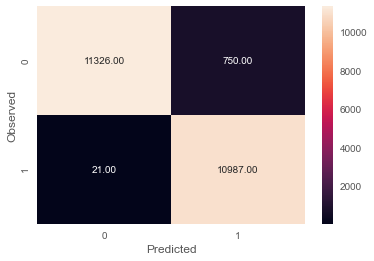

None
Recall: 0.9980922965116279

Precision: 0.9360995143563091

F1 Score: 0.9661024400967245

Roc Auc Score: 0.967992819338954


In [545]:
print("===============================================================") 
print("METRICS RELATED TO RANDOM FOREST MODEL PERFORMANCE") 
print("===============================================================") 
print("Trainig accuracy",train_acc)  
print()
print("Testing accuracy",test_acc)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Recall:",recall)
print()
print("Precision:",precision)
print()
print("F1 Score:",f1)
print()
print("Roc Auc Score:",roc_auc)

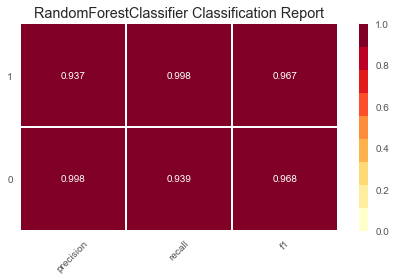

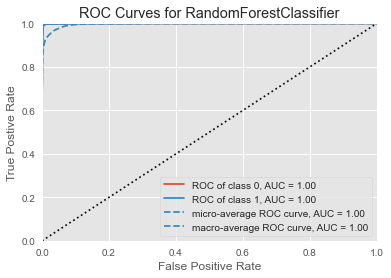

In [546]:
# Visualize model performance with yellowbrick library
visClassifierResults(RandomForestClassifier(n_estimators = 50))

### Apply Bagging Classifier Algorithm and print the accuracy.

In [547]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [548]:
y_predict = bgcl.predict(X_test)
train_acc = bgcl.score(X_train,y_train)
test_acc = accuracy_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test,y_predict)

In [549]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging'],'Train Acc(%)': [train_acc*100],'Test Acc(%)': [test_acc*100], 'Recall(%)': [recall*100], 'Precision(%)': [precision*100], 'F1 Score(%)': [f1*100], 'ROC AUC Score(%)': [roc_auc*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Acc(%)','Test Acc(%)', 'Recall(%)','Precision(%)','F1 Score(%)','ROC AUC Score(%)']]
resultsDf

,Method,Train Acc(%),Test Acc(%),Recall(%),Precision(%),F1 Score(%),ROC AUC Score(%)
0,Logistic Regression,83.37,83.34,80.54,83.88,82.18,83.22
0,Decision Tree (Gini),78.60,78.63,87.48,73.04,79.61,79.02
0,Decision Tree (Entropy),78.08,78.18,85.36,73.28,78.86,78.49
0,Random Forest,100.00,96.66,99.81,93.61,96.61,96.80
0,Bagging,99.80,95.35,99.87,91.21,95.34,95.55


METRICS RELATED TO BAGGING CLASSIFIER MODEL PERFORMANCE
Trainig accuracy 0.9980319711850876

Testing accuracy 0.9534742678911801

Confusion Matrix


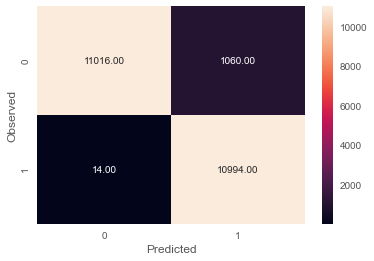

None
Recall: 0.9987281976744186

Precision: 0.9120623859299818

F1 Score: 0.953429884658746

Roc Auc Score: 0.9554753939680473


In [550]:
print("===============================================================") 
print("METRICS RELATED TO BAGGING CLASSIFIER MODEL PERFORMANCE") 
print("===============================================================") 
print("Trainig accuracy",train_acc)  
print()
print("Testing accuracy",test_acc)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Recall:",recall)
print()
print("Precision:",precision)
print()
print("F1 Score:",f1)
print()
print("Roc Auc Score:",roc_auc)

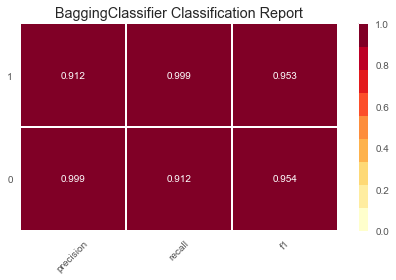

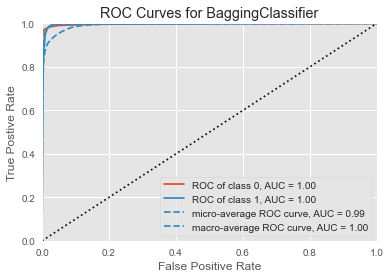

In [551]:
# Visualize model performance with yellowbrick library
visClassifierResults(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [552]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [553]:
y_predict = gbcl.predict(X_test)
train_acc = gbcl.score(X_train,y_train)
test_acc = accuracy_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test,y_predict)

In [554]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'],'Train Acc(%)': [train_acc*100],'Test Acc(%)': [test_acc*100], 'Recall(%)': [recall*100], 'Precision(%)': [precision*100], 'F1 Score(%)': [f1*100], 'ROC AUC Score(%)': [roc_auc*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Acc(%)','Test Acc(%)', 'Recall(%)','Precision(%)','F1 Score(%)','ROC AUC Score(%)']]
resultsDf

,Method,Train Acc(%),Test Acc(%),Recall(%),Precision(%),F1 Score(%),ROC AUC Score(%)
0,Logistic Regression,83.37,83.34,80.54,83.88,82.18,83.22
0,Decision Tree (Gini),78.60,78.63,87.48,73.04,79.61,79.02
0,Decision Tree (Entropy),78.08,78.18,85.36,73.28,78.86,78.49
0,Random Forest,100.00,96.66,99.81,93.61,96.61,96.80
0,Bagging,99.80,95.35,99.87,91.21,95.34,95.55
0,Gradient Boost,84.75,84.37,85.49,82.40,83.92,84.42


METRICS RELATED TO GRADIENTBOOST CLASSIFIER MODEL PERFORMANCE
Trainig accuracy 0.8474777668442843

Testing accuracy 0.8437445849939352

Confusion Matrix


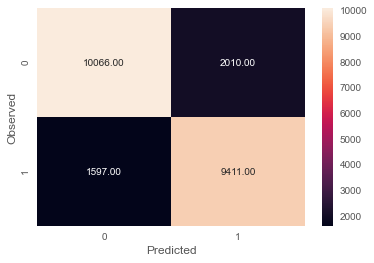

None
Recall: 0.8549236918604651

Precision: 0.8240084055686893

F1 Score: 0.8391814169156003

Roc Auc Score: 0.8442389244330482


In [555]:
print("===============================================================") 
print("METRICS RELATED TO GRADIENTBOOST CLASSIFIER MODEL PERFORMANCE") 
print("===============================================================") 
print("Trainig accuracy",train_acc)  
print()
print("Testing accuracy",test_acc)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Recall:",recall)
print()
print("Precision:",precision)
print()
print("F1 Score:",f1)
print()
print("Roc Auc Score:",roc_auc)

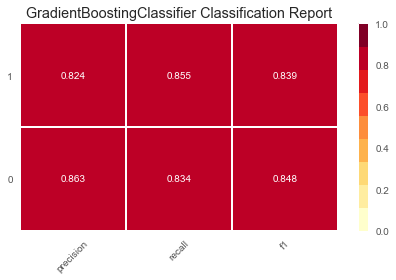

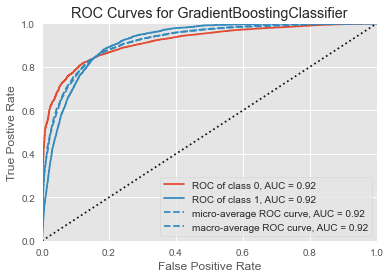

In [557]:
# Visualize model performance with yellowbrick library
visClassifierResults(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [558]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 50, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [559]:
y_predict =abcl.predict(X_test)
train_acc = abcl.score(X_train,y_train)
test_acc = accuracy_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test,y_predict)

In [560]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Adaboost'],'Train Acc(%)': [train_acc*100],'Test Acc(%)': [test_acc*100], 'Recall(%)': [recall*100], 'Precision(%)': [precision*100], 'F1 Score(%)': [f1*100], 'ROC AUC Score(%)': [roc_auc*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Acc(%)','Test Acc(%)', 'Recall(%)','Precision(%)','F1 Score(%)','ROC AUC Score(%)']]
resultsDf

,Method,Train Acc(%),Test Acc(%),Recall(%),Precision(%),F1 Score(%),ROC AUC Score(%)
0,Logistic Regression,83.37,83.34,80.54,83.88,82.18,83.22
0,Decision Tree (Gini),78.60,78.63,87.48,73.04,79.61,79.02
0,Decision Tree (Entropy),78.08,78.18,85.36,73.28,78.86,78.49
0,Random Forest,100.00,96.66,99.81,93.61,96.61,96.80
0,Bagging,99.80,95.35,99.87,91.21,95.34,95.55
0,Gradient Boost,84.75,84.37,85.49,82.40,83.92,84.42
0,Adaboost,80.13,79.83,77.23,79.82,78.50,79.72


METRICS RELATED TO ADABOOST MODEL PERFORMANCE
Trainig accuracy 0.8012847886225655

Testing accuracy 0.7983018540980766

Confusion Matrix


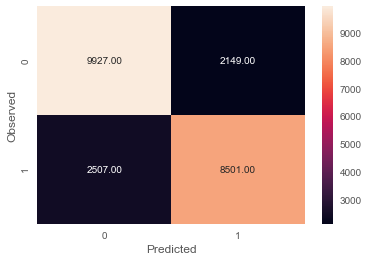

None
Recall: 0.7722565406976745

Precision: 0.7982159624413145

F1 Score: 0.7850217009880875

Roc Auc Score: 0.7971501318923946


In [561]:
print("===============================================================") 
print("METRICS RELATED TO ADABOOST MODEL PERFORMANCE") 
print("===============================================================") 
print("Trainig accuracy",train_acc)  
print()
print("Testing accuracy",test_acc)
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Recall:",recall)
print()
print("Precision:",precision)
print()
print("F1 Score:",f1)
print()
print("Roc Auc Score:",roc_auc)

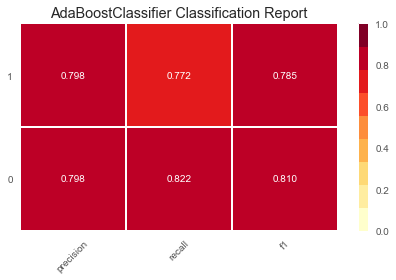

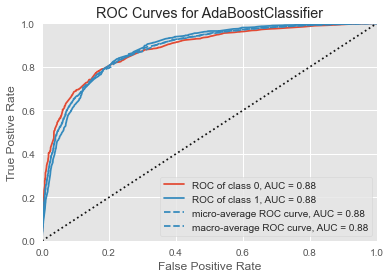

In [563]:
# Visualize model performance with yellowbrick library
visClassifierResults(AdaBoostClassifier(n_estimators= 50, learning_rate=0.1, random_state=22))

# For this dataset, Random forest gives the best results on test predictions. Conclusion is based on recall & precision, which are the most important metrics for this predictive model. Even the testing accuracy is 96.66% which is the best among all models.

- Random forest model metrics:
    - Testing Accuracy: 96.66%
    - Recall: 99.81%
    - Precision: 93.61%
    - F1 Score: 96.61%
    - Roc Auc Score: 96.80%
    
#### Comparative Metrics for different models are as shown below.

In [564]:
resultsDf

,Method,Train Acc(%),Test Acc(%),Recall(%),Precision(%),F1 Score(%),ROC AUC Score(%)
0,Logistic Regression,83.37,83.34,80.54,83.88,82.18,83.22
0,Decision Tree (Gini),78.60,78.63,87.48,73.04,79.61,79.02
0,Decision Tree (Entropy),78.08,78.18,85.36,73.28,78.86,78.49
0,Random Forest,100.00,96.66,99.81,93.61,96.61,96.80
0,Bagging,99.80,95.35,99.87,91.21,95.34,95.55
0,Gradient Boost,84.75,84.37,85.49,82.40,83.92,84.42
0,Adaboost,80.13,79.83,77.23,79.82,78.50,79.72


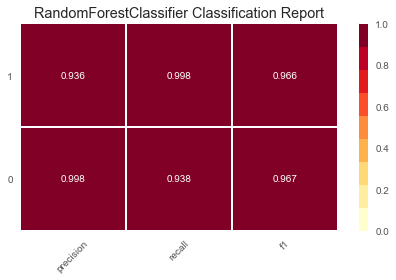

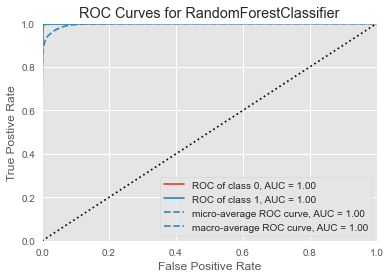

In [565]:
visClassifierResults(RandomForestClassifier(n_estimators = 50))